# Load Dataset

In [208]:
import numpy as np
import pandas as pd

#Import dataset as a dataframe first without headers
data = pd.DataFrame(np.genfromtxt("HW3Data.csv", delimiter=","))

In [209]:
data.shape

(62, 2001)

In [210]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,0.0,2.080754,1.099069,0.927763,1.029081,-0.130763,1.265460,-0.436286,0.728881,2.107979,...,-0.825403,-0.138451,0.382957,0.876697,-0.216234,-1.408300,0.393327,-0.148522,1.591533,-0.217481
1,1.0,1.109457,0.786453,0.445560,-0.146323,-0.996316,0.555759,0.290734,-0.145259,1.132660,...,-1.056288,-0.205499,-1.815374,0.324373,-1.296909,-0.870757,1.108739,1.094010,-0.492141,-1.554079
2,0.0,-0.676530,1.693100,1.559247,1.559983,-0.982179,-1.358507,-1.313994,-0.455067,0.295214,...,1.242968,1.230157,-2.038999,2.366093,0.820656,1.404501,0.176860,-0.086285,-0.390878,-0.089465
3,1.0,0.534396,1.677537,1.489030,0.778605,-0.183776,-1.116850,-1.487557,-0.579511,0.292683,...,0.559852,-0.593149,-4.440577,1.720705,-0.124617,-0.435880,0.228440,-0.893938,1.005879,-0.631247
4,0.0,-1.018903,0.511080,0.755641,1.013816,0.529899,0.160440,-0.087055,1.295290,0.458736,...,0.227110,0.497628,-0.083921,-0.382733,-0.913389,1.122928,0.834571,-0.283786,-2.860340,0.280871


## Retrieve headers for dataframe from Genes.txt

In [211]:
#Load data from txt file into an array to become headers of dataframe (first column to be the instance labels, y)
headers = np.genfromtxt("Genes.txt", delimiter = "\n", dtype = str)
NewHead = np.append('Instance label', headers)

In [212]:
#Now add headers to data, taking note that the first column is the class label (y)
data.columns = NewHead

In [213]:
#Visualize the updated dataframe
data.head()

,Instance label,Hsa.3004 H55933 3' UTR 1 203417 H.sapiens mRNA for homologue to yeast ribosomal protein L41.,Hsa.13491 R39465 3' UTR 2a 23933 EUKARYOTIC INITIATION FACTOR 4A (Oryctolagus cuniculus),Hsa.13491 R39465 3' UTR 2a 23933 EUKARYOTIC INITIATION FACTOR 4A (Oryctolagus cuniculus),Hsa.37254 R85482 3' UTR 2a 180093 SERUM RESPONSE FACTOR (Homo sapiens),"Hsa.541 U14973 gene 1 ""Human ribosomal protein S29 mRNA, complete cds. """,Hsa.20836 R02593 3' UTR 2a 124094 60S ACIDIC RIBOSOMAL PROTEIN P1 (Polyorchis penicillatus),Hsa.1977 T51496 3' UTR 1 71488 60S RIBOSOMAL PROTEIN L37A (HUMAN).,Hsa.44472 H80240 3' UTR 2a 240814 INTER-ALPHA-TRYPSIN INHIBITOR COMPLEX COMPONENT II PRECURSOR (Homo sapiens),Hsa.3087 T65938 3' UTR 1 81639 TRANSLATIONALLY CONTROLLED TUMOR PROTEIN (HUMAN);.,...,Hsa.2618 X67699 gene 1 H.sapiens HE5 mRNA for CDw52 antigen.,Hsa.27285 R70790 3' UTR 2a 142585 GTP:AMP PHOSPHOTRANSFERASE MITOCHONDRIAL (Rattus norvegicus),"Hsa.41260 L11706 gene 1 ""Human hormone-sensitive lipase (LIPE) gene, complete cds. """,Hsa.14822 T90549 3' UTR 2a 110713 P-SELECTIN PRECURSOR (Homo sapiens),Hsa.336 D17390 gene 1 Human mRNA for MDC protein.,"Hsa.984 M33210 gene 1 ""Human colony stimulating factor 1 receptor (CSF1R) gene, exon 5. """,Hsa.35124 H18490 3' UTR 2a 171840 RAN GTPASE ACTIVATING PROTEIN 1 (Mus musculus),Hsa.3952 H40891 3' UTR 2a 175983 NODULATION PROTEIN Q (Azospirillum brasilense),Hsa.32734 R77780 3' UTR 2a 145300 TRANSPOSABLE ELEMENT ACTIVATOR (Zea mays),Hsa.9683 T49647 3' UTR 2a 67762 MYRISTOYLATED ALANINE-RICH C-KINASE SUBSTRATE (Homo sapiens)
0,0.0,2.080754,1.099069,0.927763,1.029081,-0.130763,1.265460,-0.436286,0.728881,2.107979,...,-0.825403,-0.138451,0.382957,0.876697,-0.216234,-1.408300,0.393327,-0.148522,1.591533,-0.217481
1,1.0,1.109457,0.786453,0.445560,-0.146323,-0.996316,0.555759,0.290734,-0.145259,1.132660,...,-1.056288,-0.205499,-1.815374,0.324373,-1.296909,-0.870757,1.108739,1.094010,-0.492141,-1.554079
2,0.0,-0.676530,1.693100,1.559247,1.559983,-0.982179,-1.358507,-1.313994,-0.455067,0.295214,...,1.242968,1.230157,-2.038999,2.366093,0.820656,1.404501,0.176860,-0.086285,-0.390878,-0.089465
3,1.0,0.534396,1.677537,1.489030,0.778605,-0.183776,-1.116850,-1.487557,-0.579511,0.292683,...,0.559852,-0.593149,-4.440577,1.720705,-0.124617,-0.435880,0.228440,-0.893938,1.005879,-0.631247
4,0.0,-1.018903,0.511080,0.755641,1.013816,0.529899,0.160440,-0.087055,1.295290,0.458736,...,0.227110,0.497628,-0.083921,-0.382733,-0.913389,1.122928,0.834571,-0.283786,-2.860340,0.280871


# Prepare data with holdout method for later testing

Use a test size 20% of the dataset

In [214]:
#Set X to features, y to class label
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [215]:
#Holdout method for testing, use the reduced X
from sklearn.model_selection import train_test_split

#Split using Holdout cross-validation method
#test_size = 0.20 to make 20% of data the test data

X_train, X_test, y_train, y_test = \
    train_test_split(X,y,   
                     test_size=0.20,   
                     stratify=y,
                     random_state=3)


Changing the seed value of random_state in the above cell changes the outcome, including the optimal number of features and the accuracy of the model. If we set random_state = None, this will act as a random seed each time the code is run. For simplicity, an arbitrary seed (3) was chosen.

# Use RFE on training set

Use recursive feature elimination on the training set of data after normalizing/standardizing both the training and test sets with StandardScaler. 

Optimal number of features : 243


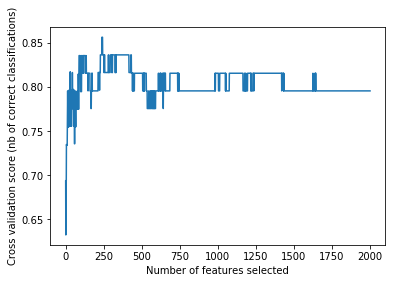

In [216]:
#Imports
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold as KFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn import preprocessing

#Need to use scaler from sklearn.preprocessing. We use scaler to normalize X_train and X_test before applying 
#feature selection techniques
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

#Create RFE object, then compute cross-validated score
svc = SVC(kernel="linear")  #RFE requires coef_ or feature_importance attributes, which are only available in linear kernel!
rfecv = RFECV(estimator=svc, step = 1, cv=KFold(2), scoring='accuracy')

clf = rfecv.fit(X_train_transformed, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

#Plot number of features vs. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

In [217]:
svc.fit(X_train_transformed[:,rfecv.support_],y_train)

#Print out holdout performance (accuracy)
print("Performance accuracy for holdout test set : %.3f" % svc.score(X_test_transformed[:, rfecv.support_],y_test))

Performance accuracy for holdout test set : 0.923


To reiterate, this performance metric value will change any time the seed for the random_state during holdout is altered.